<a href="https://colab.research.google.com/github/Ksianka/HW_Charts/blob/main/%5Bhw1%5D_hse_causasus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

import plotly.io as pio
pio.renderers.default = 'colab' # or 'notebook' or 'colab' or 'jupyterlab'

from google.colab import drive

In [2]:
# connect google drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Проходной бал ВШЭ

In [3]:
df_hse = pd.read_excel('/content/drive/MyDrive/Charts_DIY.xlsx', 
                       sheet_name = 'HSE_graduate')

# перевернем данные в удобный формат
df_hse = (
    df_hse.
    set_index('Предмет')
    .unstack().to_frame().reset_index()
    .rename(columns = {0: 'Балл', 'level_0': 'Год'})
    .sort_values(by = ['Предмет', 'Год'])
    .reset_index(drop=True)
)

# поправим форматы данных в оптимальные
df_hse['Год'] = df_hse['Год'].astype(int).astype(str)
# пример данных для 1го предмета
df_hse.head()


,Год,Предмет,Балл
0,2012,Инфокоммуникационные технологии и системы связи,69.8
1,2013,Инфокоммуникационные технологии и системы связи,78.2
2,2014,Инфокоммуникационные технологии и системы связи,74.5
3,2015,Инфокоммуникационные технологии и системы связи,75.0
4,2016,Инфокоммуникационные технологии и системы связи,81.0


In [4]:
# добавим изменение с 2012 года
df_hse['Изменение балла год к году'] = df_hse['Балл'] - df_hse['Балл'].shift()
df_hse['Изменение балла год к году'] = df_hse['Изменение балла год к году'].fillna(0)
df_hse['Изменение балла год к году'] = np.where(df_hse['Год'] == '2012', 0, 
                                             df_hse['Изменение балла год к году'])

In [5]:
def filter_out_subject(df, select_subject):
    
    subject = df.Предмет
    
    if subject == select_subject:
        return subject
    return 'Остальные предметы'

df_hse['Категория'] = df_hse.apply(filter_out_subject, 
                                 select_subject = 'Прикладная математика и информатика', 
                                 axis = 1)

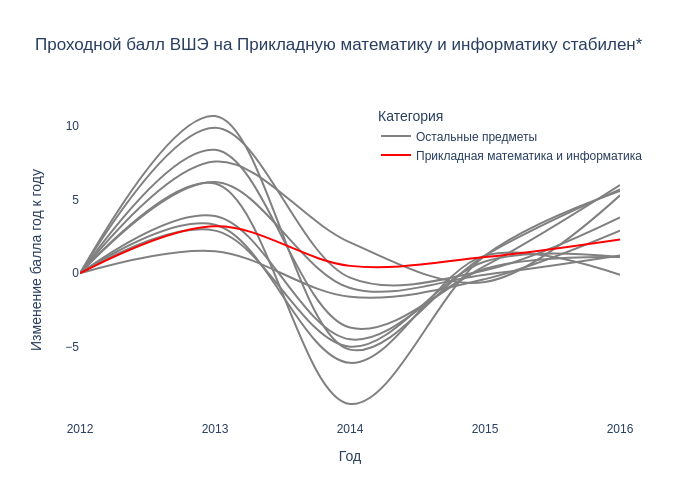

* Проходной балл на Прикладную математику и информатику в 2012 году был 89.4


In [17]:
fig = px.line(df_hse, x="Год", y="Изменение балла год к году", color="Категория", 
              line_group="Предмет", hover_name="Предмет",
        line_shape="spline", render_mode="png", 
        color_discrete_sequence = ['grey', 'red'], 
        title = 'Проходной балл ВШЭ на Прикладную математику и информатику стабилен*')

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="center",
    x=0.80
))

fig.show('png')

print('* Проходной балл на Прикладную математику и информатику в 2012 году был 89.4')

Русские на Кавказе

,Республики,1979.0,1989.0,2002.0
0,Чечня и Ингушетия,29.0,23.0,3.0
1,Дагестан,11.0,9.0,5.0
2,Северная Осетия,34.0,30.0,23.0
3,Кабардино-Балкария,35.0,32.0,25.0
4,Карачаево-Черкессия,54.0,NaN,34.0


In [50]:
df_cauc_abs = pd.read_excel('/content/drive/MyDrive/Charts_DIY.xlsx', 
                       sheet_name = 'russian_caucaus_abs')

df_cauc_pct = pd.read_excel('/content/drive/MyDrive/Charts_DIY.xlsx', 
                       sheet_name = 'russian_caucaus')

# перевернем данные в удобный формат
def preprocess_df(df, data_source):
  df = (
      df.
      set_index('Республики')
      .unstack().to_frame().reset_index()
      .rename(columns = {0: data_source, 'level_0': 'Год'})
      .sort_values(by = ['Республики', 'Год'])
      .reset_index(drop=True)
  )

  # поправим форматы данных в оптимальные
  df['Год'] = df['Год'].astype(int).astype(str)

  return df

df_cauc_abs = preprocess_df(df_cauc_abs, data_source = 'Население русские, абс')
df_cauc_pct = preprocess_df(df_cauc_pct, data_source = 'Население русские, %')
# пример данных для 1го предмета

df_cauc = (
    df_cauc_abs
    .merge(df_cauc_pct, on = ['Год', 'Республики'], how = 'left')

)
df_cauc.head()

,Год,Республики,"Население русские, абс","Население русские, %"
0,1979,Дагестан,190.0,11.0
1,1989,Дагестан,166.0,9.0
2,2002,Дагестан,121.0,5.0
3,1979,Кабардино-Балкария,234.0,35.0
4,1989,Кабардино-Балкария,241.0,32.0


In [51]:
def filter_out_region(df, select_region):
    
    subject = df.Республики
    
    if subject == select_region:
        return subject
    return 'Остальные республики Кавказа'

df_cauc['Республика'] = df_cauc.apply(filter_out_region, 
                                 select_region = 'Чечня и Ингушетия', 
                                 axis = 1)

In [54]:
# уберем карачаево-черкесию - по ней нет данных в 1989 году
df_cauc = df_cauc.query('Республики != "Карачаево-Черкессия"')

# расчитаем население республики

df_cauc['Население, абс'] = df_cauc['Население русские, абс'] / (df_cauc['Население русские, %'] / 100)

In [86]:
df_cauc_agg = (
    df_cauc
    .groupby(['Год', 'Республика'], as_index=False)
    .agg({'Население русские, абс': 'sum',
          'Население, абс': 'sum'})

)

df_cauc_agg['Население русские, %'] = np.round((df_cauc_agg['Население русские, абс'] / df_cauc_agg['Население, абс']) * 100, 2)

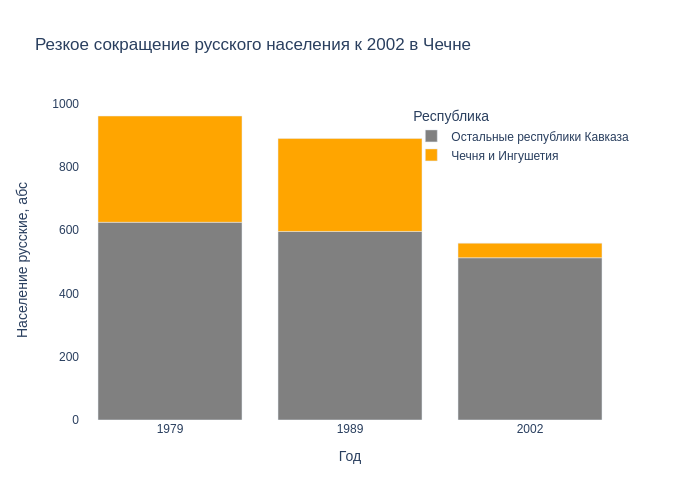

In [89]:
fig = px.bar(df_cauc_agg, x="Год", y="Население русские, абс", color="Республика",
             color_discrete_sequence = ['grey', 'orange'],
             title = 'Резкое сокращение русского населения к 2002 в Чечне')

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="center",
    x=0.82
))

fig.show('png')


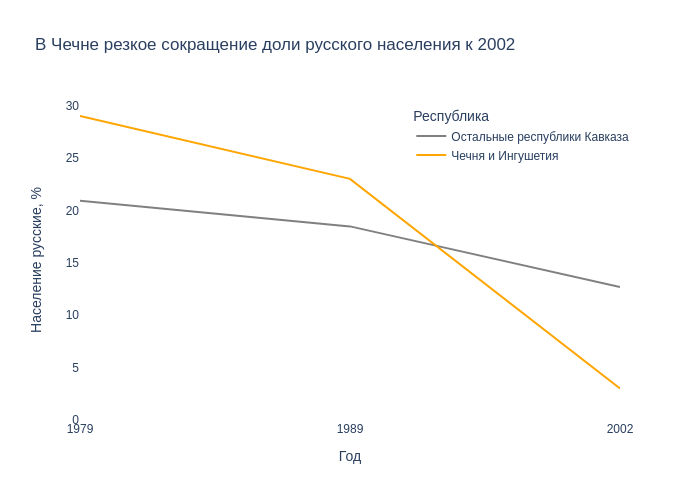

In [87]:
fig = px.line(df_cauc_agg, x="Год", y="Население русские, %", color="Республика",
             color_discrete_sequence = ['grey', 'orange'],
             orientation = 'h',
             title = 'В Чечне резкое сокращение доли русского населения к 2002')

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="center",
    x=0.82
))
fig.update_yaxes(rangemode="tozero")

fig.show('png')

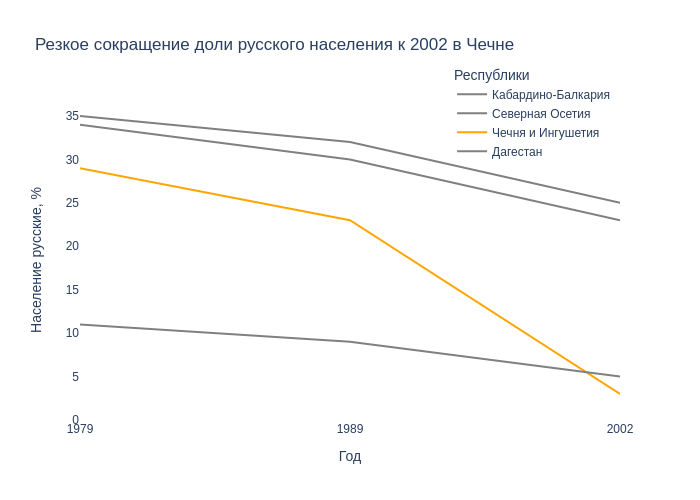

In [88]:
df_cauc = df_cauc.sort_values(by = ['Год', 'Население русские, %'], 
                              ascending=[True, False])

fig = px.line(df_cauc, x="Год", y="Население русские, %", color="Республики",
             color_discrete_sequence = ['grey', 'grey', 'orange', 'grey'],
             orientation = 'h',
             title = 'Резкое сокращение доли русского населения к 2002 в Чечне')

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.update_layout(legend=dict(
    yanchor="top",
    y=1.12,
    xanchor="center",
    x=0.84
))
fig.update_yaxes(rangemode="tozero")

fig.show('png')